In [451]:
# Create Machine Learning Model from stock metric data

# Import necessary libraries & modules


import pandas as pd
import csv
import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [452]:
# Import .csv file 
# Create DataFrame from .csv file

file = pd.read_csv('/Users/garrettwankel/PycharmProjects/New/Final_df.csv')
df = pd.DataFrame(file)



In [453]:
# Examine DataFrame

df.head()



,,Sym,SP,50-Day MA,200-Day MA,52W Range,MC,P/B,Vol,Avg Vol (3m),Avg Vol (10-day),Sh Out,Float,Insiders,Institutions
0,08-07-2020,crbp,6.61,7.35,6.36,3.29 - 8.78,560.17M,24.43,"1,324,087",1.58M,1.84M,72.49M,71.03M,4.93%,41.18%
1,08-07-2020,ccxi,55.24,56.30,50.83,6.37 - 65.43,3.75B,62.41,"366,281",732.02k,624.86k,67.83M,43.42M,28.93%,67.08%
2,08-07-2020,gwph,109.37,129.58,113.69,67.98 - 172.12,3.81B,5.87,"2,374,243",339.43k,271.39k,31.08M,30.43M,1.12%,83.33%
3,08-07-2020,imvt,27.16,25.17,19.53,8.34 - 29.96,2.11B,22.46,"253,162",427.77k,236.06k,81.81M,25.48M,73.18%,21.10%
4,08-07-2020,alny,143.53,153.62,131.42,73.32 - 167.33,16.55B,14.08,"344,523",769.09k,470.09k,114.82M,113.87M,0.80%,94.74%


In [454]:
# Rename column(s)

df.rename(columns={' ': 'Date'}, inplace=True)



In [455]:
# Examine datatypes to understand what needs to be converted to numerical values

df.dtypes



Date                 object
Sym                  object
SP                  float64
50-Day MA           float64
200-Day MA          float64
52W Range            object
MC                   object
P/B                 float64
Vol                  object
Avg Vol (3m)         object
Avg Vol (10-day)     object
Sh Out               object
Float                object
Insiders             object
Institutions         object
dtype: object

In [456]:
# Subset DataFrame for ML model implementation
# Reset index of Subset

df2 = df[df['Sym'] == 'imvt']
df2.reset_index(inplace=True)



In [457]:
# Remove non-numerical characters from featured columns for uniformity
# Convert object .dtype to float

df2['Vol'] = df2.replace(',', '', regex=True)
df2['Avg Vol (10-day)'] = df2.replace('k', '', regex=True)
df2[['Vol', 'Avg Vol (10-day)']] = df2[['Vol', 'Avg Vol (10-day)']].astype(float)
df2.dtypes



/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/garrettwankel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

index                 int64
Date                 object
Sym                  object
SP                  float64
50-Day MA           float64
200-Day MA          float64
52W Range            object
MC                   object
P/B                 float64
Vol                 float64
Avg Vol (3m)         object
Avg Vol (10-day)    float64
Sh Out               object
Float                object
Insiders             object
Institutions         object
dtype: object

In [458]:
# Define features variables

X = df2[['50-Day MA', '200-Day MA', 'Vol', 'Avg Vol (10-day)']]

y = df2['SP']


In [459]:
y.shape, X.shape

((24,), (24, 4))

In [460]:
# Split dataset into train & test, specify test_size
X = np.array(X)
X = preprocessing.scale(X)
y = np.array(y)

train_X, test_x, train_y, test_y = train_test_split(X, y, test_size=.25, random_state=10)



In [461]:
# Create function to determine best 'max_leaf_nodes' value for each model
# Create for loop to iterate through list of possible values
# Print 'max_leaf_nodes' with corresponding 'mean_absolute_error'

def get_mae(max_leaf_nodes, train_X, test_x, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
    model2 = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes)
    model3 = LinearRegression()
    pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor())])
    model.fit(train_X, train_y)
    model2.fit(train_X, train_y)
    model3.fit(train_X, train_y)
    pipe.fit(train_X, train_y)
    preds1 = model.predict(test_x)
    preds2 = model2.predict(test_x)
    preds3 = model2.predict(test_x)
    preds4 = pipe.predict(test_x)
    mae1 = mean_absolute_error(preds1, test_y)
    mae2 = mean_absolute_error(preds2, test_y)
    mae3 = mean_absolute_error(preds3, test_y)
    mae4 = mean_absolute_error(preds4, test_y)
    return(mae1, mae2, mae3, mae4)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, test_x, train_y, test_y)
    print(max_leaf_nodes, my_mae)
    
    

5 (0.8424999999999994, 1.0494224735449802, 1.0494224735449802, 1.0670500000000078)
50 (0.8383333333333342, 1.1280666666666708, 1.1280666666666708, 1.1032333333333384)
500 (0.8383333333333342, 0.9867333333333352, 0.9867333333333352, 1.0185499999999987)
5000 (0.8383333333333342, 1.0333166666666642, 1.0333166666666642, 1.1153333333333357)


In [462]:
# Create models for predicting
# Train models

model = DecisionTreeRegressor(max_leaf_nodes=5)
model2 = RandomForestRegressor(max_leaf_nodes=50, n_estimators=200, criterion='mae')
model3 = LinearRegression()
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(max_leaf_nodes=5))])
model.fit(train_X,train_y)
model2.fit(train_X, train_y)
model3.fit(train_X, train_y)
pipe.fit(train_X, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest', RandomForestRegressor(max_leaf_nodes=5))])

In [463]:
# Lists of values

preds = []
pre_maes = []
pre_stds = []
r_maes = []
r_stds = []



In [464]:
# Make predictions

preds1 = model.predict(test_x)
preds2 = model2.predict(test_x)
preds3 = model3.predict(test_x)
preds4 = pipe.predict(test_x)

preds.append(preds1)
preds.append(preds2)
preds.append(preds3)
preds.append(preds4)


In [465]:
# Score each model to determine it's accuracy based on the returned coeeficient

print(model.score(test_x, test_y))
print(model2.score(test_x, test_y))
print(model3.score(test_x, test_y))
print(pipe.score(test_x, test_y))

0.9293854145110675
0.9149158068633652
0.8619119880175681
0.9169522660141879


In [466]:
# Find the 'mean abosolute error' of each model
# ** Helpful to determine how accurate model is **

mae1 = mean_absolute_error(test_y, preds1)
mae2 = mean_absolute_error(test_y, preds2)
mae3 = mean_absolute_error(test_y, preds3)
mae4 = mean_absolute_error(test_y, preds4)

pre_maes.append(mae1)
pre_maes.append(mae2)
pre_maes.append(mae3)
pre_maes.append(mae4)

In [467]:
std1 = mean_squared_error(test_y, preds1)
std2 = mean_squared_error(test_y, preds2)
std3 = mean_squared_error(test_y, preds3)
std4 = mean_squared_error(test_y, preds4)

pre_stds.append(std1)
pre_stds.append(std2)
pre_stds.append(std3)
pre_stds.append(std4)

In [468]:
score = cross_val_score(model, X, y, cv=5)
score

array([-76.836948  ,  -1.33254883,  -0.12929679,  -6.36451933,
       -87.16955072])

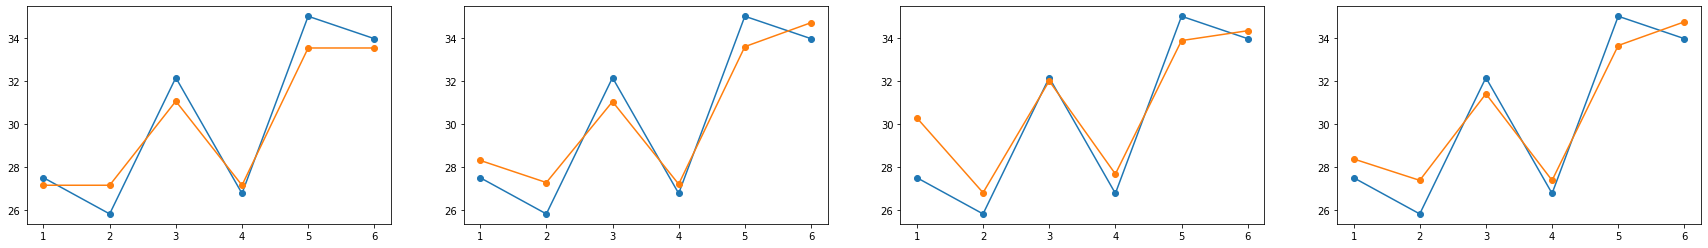

In [469]:
#plt.figure(figsize=(25,12))
#plt.plot(test_y)
#plt.plot(preds1)
#plt.plot(preds2)
#plt.plot(preds3)

titles = ['DR Regressor', 'RF Regressor', 'L Regression', 'RF Pipeline']
x = [1,2,3,4,5,6]



fig, axs = plt.subplots(1,4)
axs[0].plot(x, test_y, x, preds1, marker='o')
axs[1].plot(x, test_y, x, preds2, marker='o')
axs[2].plot(x, test_y, x, preds3, marker='o')
axs[3].plot(x, test_y, x, preds4, marker='o')


fig.subplots_adjust(right=4)

plt.show()

#red = mpatches.Patch(color='red', label='Test data')
#blue = mpatches.Patch(color='blue', label='DCR')
#green = mpatches.Patch(color='green', label='RF')
#orange = mpatches.Patch(color='orange', label='LR')
#plt.legend(handles=[red, blue, green, orange])
#plt.show()


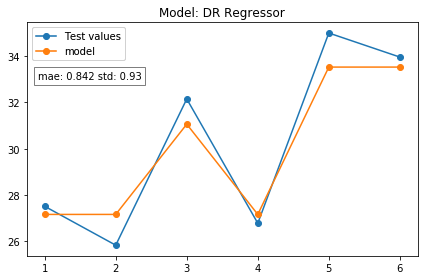

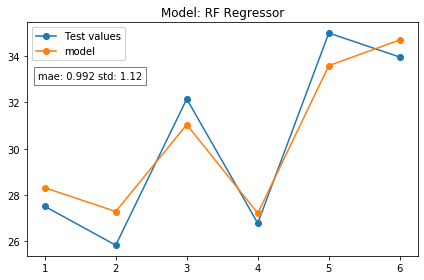

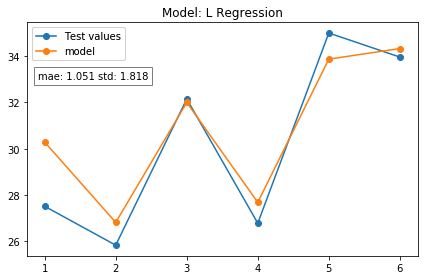

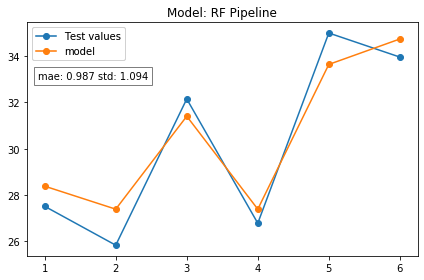

In [470]:
titles = ['DR Regressor', 'RF Regressor', 'L Regression', 'RF Pipeline']
test_set = 'Test values'

def stock_plot(pred, title, r_mae, r_std):

    x = [1,2,3,4,5,6]
    ax = plt.subplot(1,1,1)
    ax.plot(x, test_y, x, pred, marker='o')
    ax.set_title('Model: ' + title)
    
    legend_1 = ax.legend(labels=[test_set, 'model'])
    axs = plt.gca().add_artist(legend_1)
    ax.text(.9, 33, s= 'mae: '+str(r_mae) + ' std: '+str(r_std), bbox=dict(edgecolor='black', facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

def rounder(mae, std):
    r_mae = round(mae, 3)
    r_std = round(std, 3)
    r_maes.append(r_mae)
    r_stds.append(r_std)
    
for mae, std in zip(pre_maes, pre_stds):
    rounder(mae, std)

for pred, title, r_mae, r_std in zip(preds, titles, r_maes, r_stds):
    stock_plot(pred, title, r_mae, r_std)
    
    
    
    